**IMPORT MODULES**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import math
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

**LOADING DATA**

In [20]:
# Set file path and convert csv file to pandas data frame
file_path = r'C:\Users\Sarvesh\Desktop\STAT 4355 Assignments\STAT 4355 Final Project\admission_data.csv'
grad_df = pd.read_csv(file_path)

**CLEANING DATA**

In [21]:
# Assign column names
grad_df.columns = ['GRE', 'TOEFL', 'UnivRtg', 'SOP', 'LOR', 'CGPA', 'Research', 'AdmitChance']
# Remove duplicates
grad_df = grad_df.drop_duplicates()
# Remove entries with missing values
grad_df = grad_df.dropna()
# Check variable data types
# grad_df.info()

# Subset data by university ratings
grad_df_ur_1 = grad_df[grad_df['UnivRtg'] == 1] # 34 observations
grad_df_ur_2 = grad_df[grad_df['UnivRtg'] == 2] # 126 observations
grad_df_ur_3 = grad_df[grad_df['UnivRtg'] == 3] # 162 observations
grad_df_ur_4 = grad_df[grad_df['UnivRtg'] == 4] # 105 observations
grad_df_ur_5 = grad_df[grad_df['UnivRtg'] == 5] # 73 observations

print(grad_df)

     GRE  TOEFL  UnivRtg  SOP  LOR  CGPA  Research  AdmitChance
0    337    118        4  4.5  4.5  9.65         1         0.92
1    324    107        4  4.0  4.5  8.87         1         0.76
2    316    104        3  3.0  3.5  8.00         1         0.72
3    322    110        3  3.5  2.5  8.67         1         0.80
4    314    103        2  2.0  3.0  8.21         0         0.65
..   ...    ...      ...  ...  ...   ...       ...          ...
495  332    108        5  4.5  4.0  9.02         1         0.87
496  337    117        5  5.0  5.0  9.87         1         0.96
497  330    120        5  4.5  5.0  9.56         1         0.93
498  312    103        4  4.0  5.0  8.43         0         0.73
499  327    113        4  4.5  4.5  9.04         0         0.84

[500 rows x 8 columns]


**EXPLORATORY DATA ANALYSIS**

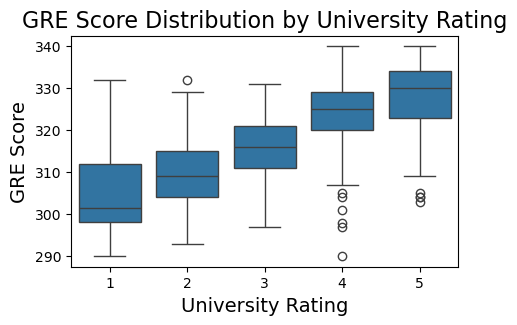

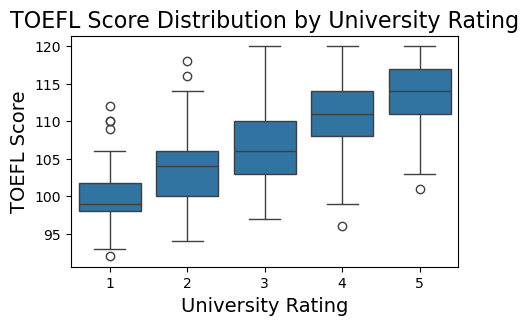

<Figure size 500x300 with 0 Axes>

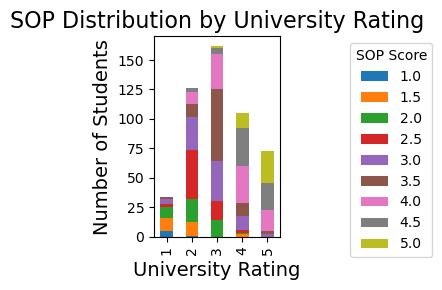

<Figure size 500x300 with 0 Axes>

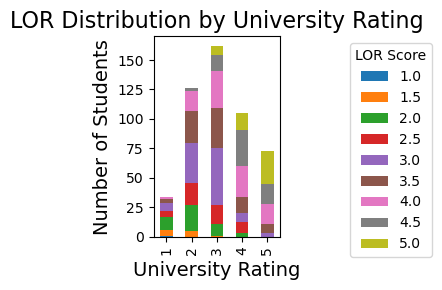

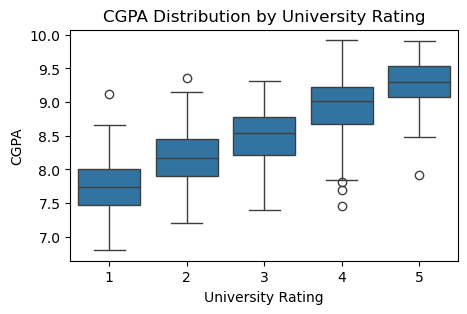

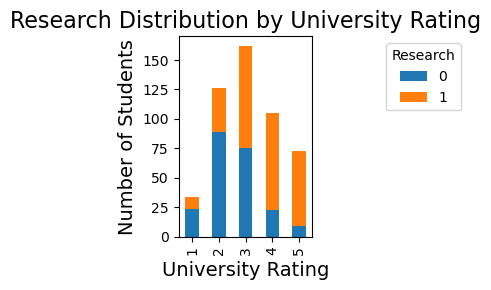

<Figure size 500x300 with 0 Axes>

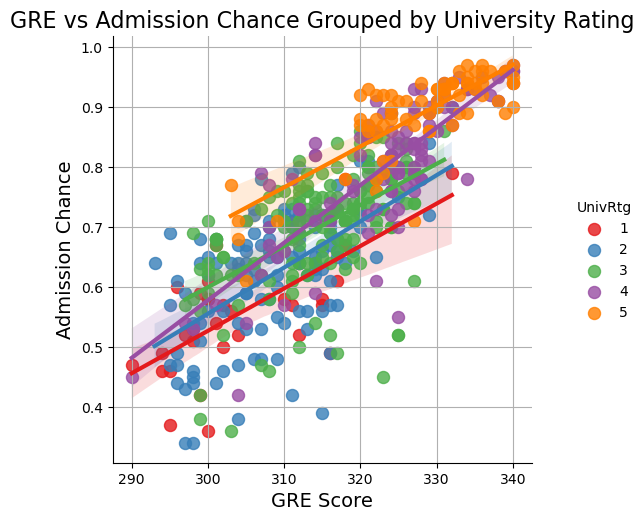

<Figure size 500x300 with 0 Axes>

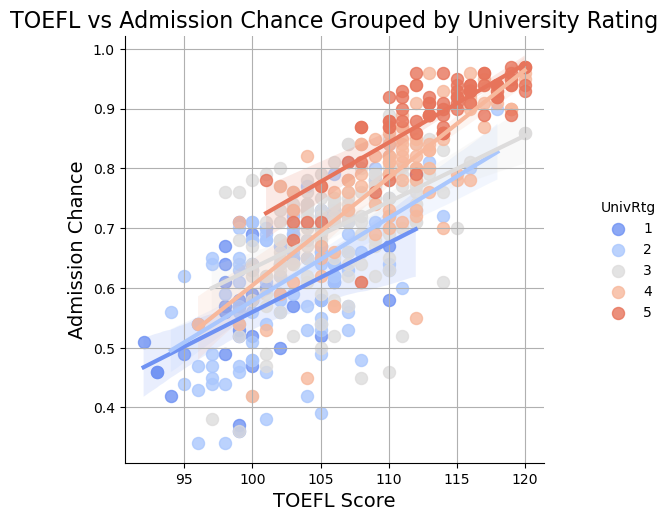

<Figure size 500x300 with 0 Axes>

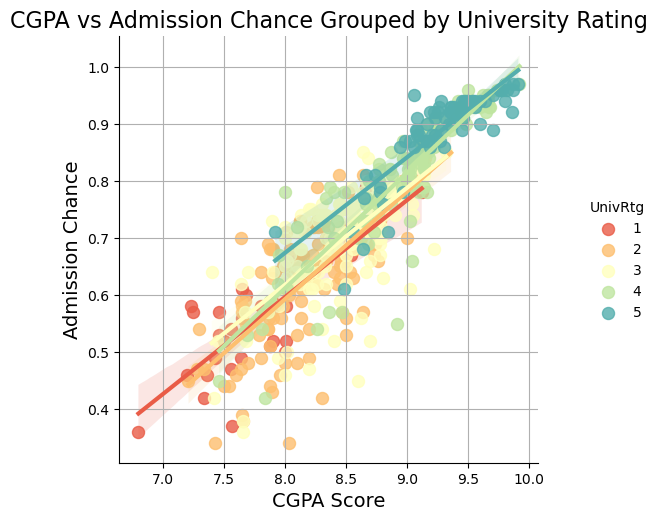

In [22]:
# Box Plot: University Rating vs GRE
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'GRE', x = 'UnivRtg', data = grad_df)
plt.title('GRE Score Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('GRE Score', fontsize = 14)
plt.show()

# Box Plot: University Rating vs TOEFL
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'TOEFL', x = 'UnivRtg', data = grad_df)
plt.title('TOEFL Score Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('TOEFL Score', fontsize = 14)
plt.show()

# Bar Plot: University Rating vs SOP 
plt.figure(figsize = (5, 3))
sop_counts = grad_df.groupby(['UnivRtg', 'SOP']).size().unstack()
sop_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('SOP Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title ='SOP Score', bbox_to_anchor =(1.5, 1), loc= 'upper left')
plt.tight_layout()
plt.show()

# Bar Plot: University Rating vs LOR
plt.figure(figsize = (5, 3))
lor_counts = grad_df.groupby(['UnivRtg', 'LOR'], observed = False).size().unstack()
lor_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('LOR Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title = 'LOR Score', bbox_to_anchor = (1.5, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Box Plot: University Rating vs CGPA
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'CGPA', x = 'UnivRtg', data = grad_df)
plt.title('CGPA Distribution by University Rating')
plt.xlabel('University Rating')
plt.ylabel('CGPA')
plt.show()

# Bar Plot: University Rating vs Research
res_counts = grad_df.groupby(['UnivRtg', 'Research'], observed = False).size().unstack()
res_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('Research Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title = 'Research', bbox_to_anchor = (1.5, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Scatter Plot: GRE vs AdmitChance (grouped by University Rating)
grad_df['UnivRtg'] = grad_df['UnivRtg'].astype('category')

plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'GRE', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'Set1', 
          line_kws = {'linewidth' : 3})
plt.title('GRE vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('GRE Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

# Scatter Plot: TOEFL vs AdmitChance (grouped by University Rating)
plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'TOEFL', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'coolwarm', 
          line_kws = {'linewidth' : 3})
plt.title('TOEFL vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('TOEFL Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

# Scatter Plot: CGPA vs AdmitChance (grouped by University Rating)
plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'CGPA', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'Spectral', 
          line_kws = {'linewidth' : 3})
plt.title('CGPA vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('CGPA Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

**CORRELATION ANALYSIS**

**MODEL BUILDING**

***UNIVERSITY RATING: 5 (MULTIPLE REGRESSION MODEL)***

C:\Users\Sarvesh\anaconda3\envs\GradPred\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:            AdmitChance   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     47.06
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           2.62e-05
Time:                        14:13:35   Log-Likelihood:                 37.652
No. Observations:                  14   AIC:                            -61.30
Df Residuals:                       7   BIC:                            -56.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0862      0.328     -3.312      0.0

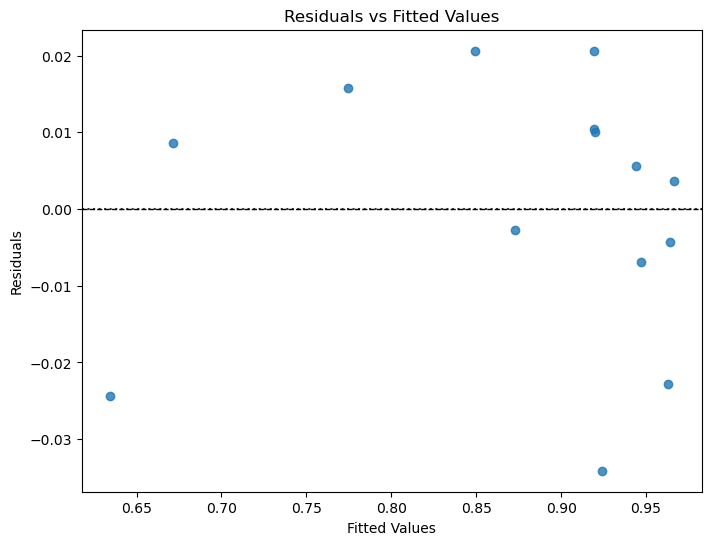

    Feature          VIF
0     const  2150.346237
1       GRE     3.506071
2     TOEFL     3.225959
3       SOP     1.161780
4       LOR     1.426846
5      CGPA     3.212406
6  Research     1.727773
Mean Squared Error: 0.0023145480751915358
R-sqd : 0.43862670184767927
RMSE : 0.04810975031312817
     Actual  Predicted
25     0.94   0.978367
429    0.95   1.011097
84     0.94   0.986804
5      0.90   0.908697
132    0.71   0.673829
497    0.93   0.919092
45     0.88   0.887552
165    0.78   0.764980
47     0.89   0.844467
337    0.94   0.945993
444    0.92   0.885948
142    0.92   0.907701
44     0.91   0.891691
213    0.96   0.934642
26     0.76   0.766727
119    0.71   0.892051
339    0.81   0.892135
260    0.87   0.915146
152    0.86   0.892225
190    0.90   0.888827
495    0.87   0.948811
82     0.92   0.875027
171    0.89   0.951705
203    0.97   0.924401
424    0.91   0.883877
34     0.94   0.911417
338    0.81   0.890994
193    0.94   0.961032
134    0.89   0.933601
234    0.91  

In [33]:
# Set up the predictos and the target variable
x_ur_5 = grad_df_ur_5[['GRE', 'TOEFL', 'SOP', 'LOR',  'CGPA',  'Research']]
y_ur_5 = grad_df_ur_5['AdmitChance']

# Partition the data into testing and training sets (80% train, 20% test)
x_train_ur_5, x_test_ur_5, y_train_ur_5, y_test_ur_5 = train_test_split(x_ur_5, y_ur_5, test_size = 0.8, random_state = 42)

# scaler = StandardScaler()
# x_train_ur_5 = scaler.fit_transform(x_train_ur_5)
# x_test_ur_5 = scaler.transform(x_test_ur_5)

# Add intercepts to the training and testing set for the predictors
x_train_ur_5 = sm.add_constant(x_train_ur_5)
x_test_ur_5 = sm.add_constant(x_test_ur_5)

# Build mltiple regression model and print summary statistics
model_ur_5 = sm.OLS(y_train_ur_5, x_train_ur_5).fit()
print(model_ur_5.summary())

# Build residual plot (residuals vs fitted values)
residuals = model_ur_5.resid
fitted = model_ur_5.fittedvalues

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted, y=residuals, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Find the VIFs to assess multicollinearity in the dataset
x_ur_5 = grad_df_ur_5[['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA', 'Research']]
x_ur_5_with_const = sm.add_constant(x_ur_5)

vif_data_ur_5 = pd.DataFrame()
vif_data_ur_5['Feature'] = x_ur_5_with_const.columns
vif_data_ur_5['VIF'] = [variance_inflation_factor(x_ur_5_with_const.values, i) for i in range(x_ur_5_with_const.shape[1])]
print(vif_data_ur_5)

# Use the trained multiple regression model to predict admission chances
y_pred_ur_5 = model_ur_5.predict(x_test_ur_5)

# Calculate MSE and R^2 metrics
mse = mean_squared_error(y_test_ur_5, y_pred_ur_5)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_ur_5, y_pred_ur_5)
print(f"Mean Squared Error: {mse}")
print(f"R-sqd : {r2}")
print(f"RMSE : {rmse}")

# Display data frame to show the actual admission chances and predicted 
#  admission chances from the testing set
act_vs_pred = pd.DataFrame({
    'Actual': y_test_ur_5.values,  # Ensure we use values, not the index
    'Predicted': y_pred_ur_5
})

print(act_vs_pred)

***UNIVERSITY RATING: 5 (XGBoost Model)***

In [32]:
# Initializing XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror', 
    n_estimators = 50, 
    learning_rate = 0.1, 
    max_depth = 3, 
    subsample = 0.8, 
    colsample_bytree = 0.8, 
    random_state = 42
)

# Training XGBoost Model
xgb_model.fit(x_train_ur_5, y_train_ur_5)
# Making Predictions with XGBoost Model
xgb_y_pred_ur_5 = xgb_model.predict(x_test_ur_5)

# Calculate MSE and R^2 metrics
mse = mean_squared_error(y_test_ur_5, xgb_y_pred_ur_5)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_ur_5, xgb_y_pred_ur_5)
print(f"Mean Squared Error: {mse}")
print(f"R-sqd : {r2}")
print(f"RMSE : {rmse}")

# Create data frame to compare actual and predicted values
xgb_act_vs_pred = pd.DataFrame({
    "Actual" : y_test_ur_5, 
    "XGB_Pred" : xgb_y_pred_ur_5
})

# Display data frame to compare actual and predicted values
print(xgb_act_vs_pred)

Mean Squared Error: 0.0023956312745942667
R-sqd : 0.4189606842949064
RMSE : 0.04894518642925233
     Actual  XGB_Pred
25     0.94  0.958150
429    0.95  0.834647
84     0.94  0.937279
5      0.90  0.907848
132    0.71  0.648279
497    0.93  0.932299
45     0.88  0.782569
165    0.78  0.778133
47     0.89  0.954680
337    0.94  0.921175
444    0.92  0.886858
142    0.92  0.926310
44     0.91  0.895832
213    0.96  0.951164
26     0.76  0.739684
119    0.71  0.726820
339    0.81  0.726820
260    0.87  0.753115
152    0.86  0.799174
190    0.90  0.888148
495    0.87  0.757974
82     0.92  0.866239
171    0.89  0.822855
203    0.97  0.946499
424    0.91  0.891176
34     0.94  0.936564
338    0.81  0.750759
193    0.94  0.955680
134    0.89  0.906855
234    0.91  0.896091
237    0.86  0.891179
108    0.93  0.921853
385    0.96  0.949528
129    0.92  0.921175
191    0.87  0.802118
70     0.94  0.942046
286    0.92  0.936909
24     0.97  0.963481
83     0.92  0.888944
189    0.88  0.808169
35